In [1]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

## Preprocessing

In [2]:
# Loading data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Keep cryptocurrencies that are trading
df = df.loc[df['IsTrading'] == True]
# Drop IsTrading column
df = df.drop('IsTrading', axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
# Count of rows with null values
df.isnull().values.sum()

459

In [5]:
# Delete rows with null values
df = df.dropna()

In [6]:
# Only keep coins that have been mined
df = df.loc[df['TotalCoinsMined'] > 0]
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
# Drop CoinName column
df = df.drop('CoinName', axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Convert Algorithm and ProofType to numerical data
df_dummies = pd.get_dummies(df, columns=['Algorithm', 'ProofType'], drop_first=True)
#df_dummies.head()
# Amount of features
len(df_dummies.columns)

96

In [9]:
# Changing text data to numerical caused the dataframe to go from 4 features to 96.
df_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

## PCA

In [11]:
# Preserve 90% of the explained variance
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(df_scaled)
crypto_pca

array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01, ...,
        -4.85489047e-15,  1.07931886e-15, -3.68612450e-15],
       [-3.19248850e-01,  1.04354697e+00, -5.37804309e-01, ...,
        -5.38929259e-15,  1.75379096e-15, -3.70941688e-15],
       [ 2.30471594e+00,  1.66999561e+00, -6.24076993e-01, ...,
         3.13661745e-14,  1.17980418e-14,  8.13976487e-14],
       ...,
       [ 3.24179380e-01, -2.32278089e+00,  3.87363001e-01, ...,
         1.06556095e-14, -5.25796882e-14, -4.80053104e-14],
       [-1.49546262e-01, -2.05899360e+00,  3.79619710e-01, ...,
        -2.51309183e-15,  2.20270997e-15,  1.00123180e-16],
       [-2.90587486e-01,  8.27023611e-01, -2.51533368e-01, ...,
        -5.23143617e-15, -2.00246361e-17,  1.10636114e-15]])

In [12]:
# Tranform PCA to dataframe
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-4.342438e-14,3.292943e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,2.632041e-15,-4.345358e-15,4.882929e-15,8.637706e-16,2.629988e-15,3.116222e-15,-2.815918e-15,-4.854890e-15,1.079319e-15,-3.686125e-15
1,-0.319249,1.043547,-0.537804,0.001337,-4.353565e-14,3.300131e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,2.716263e-15,-4.301673e-15,5.277102e-15,1.116838e-15,2.958672e-15,3.600895e-15,-2.604527e-15,-5.389293e-15,1.753791e-15,-3.709417e-15
2,2.304716,1.669996,-0.624077,0.004420,-7.163138e-14,4.562749e-14,-0.062312,-1.554093,-0.945690,0.375087,...,2.578384e-14,1.279050e-13,-5.579044e-15,-4.297681e-14,-6.769530e-14,-2.647300e-14,6.603147e-14,3.136617e-14,1.179804e-14,8.139765e-14
3,-0.145455,-1.323925,0.177429,-0.001167,1.568585e-14,-1.157654e-14,0.000326,0.283548,0.252906,-0.079820,...,-2.322055e-15,2.244566e-14,2.000945e-15,6.822673e-15,-5.273049e-15,-2.218323e-15,1.843810e-14,5.692991e-15,-3.886395e-15,1.158925e-14
4,-0.151951,-2.044976,0.364208,-0.001636,4.162041e-14,-2.559851e-14,0.032350,0.524429,0.191031,0.074021,...,-6.830833e-14,2.051847e-14,-3.004372e-14,3.595210e-14,3.200430e-14,-2.627485e-14,4.982388e-14,-1.627207e-14,-1.172439e-13,-1.308203e-13


In [13]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

## t-SNE

In [14]:
# Create t-SNE model
tsne = TSNE(learning_rate=40)

In [15]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features

array([[ 14.117056,   9.020444],
       [  8.572521,  13.064444],
       [ 23.496334,  12.946378],
       ...,
       [-21.227484, -10.299432],
       [ -9.72103 , -15.085879],
       [  5.4783  ,  -5.790803]], dtype=float32)

In [16]:
# Check shape
tsne_features.shape

(532, 2)

In [17]:
# Prepare to plot the dataset
# The first column of transformed features
x = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

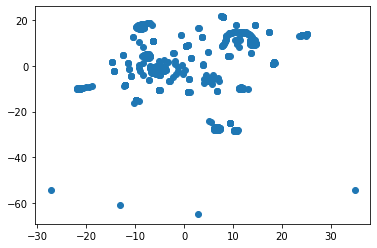

In [18]:
# Visualize the clusters
plt.scatter(x, y)
plt.show()

## k-Means

In [19]:
# Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head(10)

C:\Users\kazha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46445.752170
1,2,45378.964032
2,3,44312.177478
3,4,43242.958279
4,5,42894.706407
5,6,41160.156042
6,7,40441.215993
7,8,40252.114260
8,9,39314.866240
9,10,38786.491624


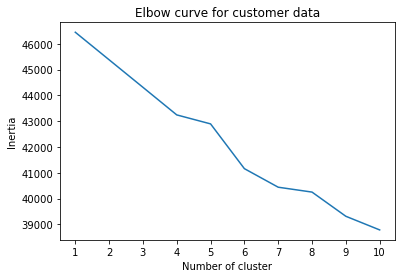

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.ylabel('Inertia')
plt.xlabel("Number of cluster")
plt.title("Elbow curve for customer data")
plt.show()

There is no clear elbow shown in the graph. Will use 4 as this is where the slope starts to decrease.

In [21]:
# Put t-SNE fetures in a dataframe
tsne_df = pd.DataFrame(tsne_features).reset_index(drop=True)
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=30)
# Fit the model
model.fit(tsne_df)
# Predict clusters
predictions = model.predict(tsne_df)
# Add the predicted class columns
tsne_df['class'] = model.labels_
tsne_df.head()

,0,1,class
0,14.117056,9.020444,0
1,8.572521,13.064444,0
2,23.496334,12.946378,0
3,6.188918,-27.860691,3
4,-12.150617,-8.452253,2


In [22]:
# Value counts of clusters
tsne_df['class'].value_counts()

2    218
0    139
1    102
3     73
Name: class, dtype: int64

In [23]:
# get_clusters function
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predictions = model.predict(data)
    data['class'] = model.labels_
    return data

In [24]:
# show_clusters function
def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

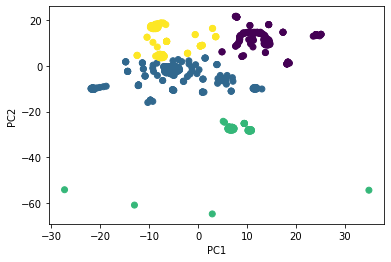

In [25]:
# Create scatter plot
clusters = get_clusters(4, tsne_df)
show_clusters(clusters)

## Conclusion
Cryptocurrencies can be successfully clustered into groups. There are 4 clusters, one of the clusters appears to be made of outliers as these cryptocurrencies are clearly shown plotted away from the other 3. Further analysis is needed to work out which cluster is ideal for the client.